# Scipy

Scipy è una libreria che si occupa di interpolazione, ottimizzazione, algebra lineare, etc che contiene diversi metodi ottimizzati per il calcolo numerico.

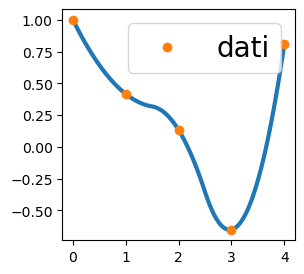

In [14]:
import scipy as sp

# il modulo "special" contiene le funzioni speciali, cioè quelle che appaiono in fenomeni fisici (come le funzioni di Bessel e la funzione Gamma)
import scipy.special as special
import matplotlib.pyplot as plt 

import numpy as np 

x = np.linspace(0, 4, 5)
y = np.cos(x**3 + np.sin(x * 3))

t = np.linspace(0, 4, 100)

from scipy import interpolate
plt.figure(figsize=(3, 3))
d = 1

f = interpolate.interp1d(x, y, kind="quadratic")

plt.plot(t, f(t), "-", linewidth = 3)
plt.plot(x, y, 'o', label="dati")
plt.legend(fontsize=20)



Supponiamo che i dati siano affetti da rumore. Allora c'è bisogno di un quasi-interpolante che approssima al meglio il valore vero. 

In [ ]:
x = np.linspace(-3, 3, 50)
r = 0.05 * np.random.randn(50)
y = np.exp(-x**2) + r

t = np.linspace(-3, 3, 100) #per il grafico
plt.figure(figsize=(6, 3))

for k  in range(3): 
    QI = interpolate.splrep(x, y, s = k/10) #s = smoothing in [0, 1) // più cresce più è liscia
    QIval = interpolate.splev(t, QI)

    plt.subplot(1, 3, k + 1)
    plt.plot(x, y, 'o', label="dati")
    plt.plot(t, QIval, label="spline QI")
    plt.axis("off")


In [ ]:
# Minimo di una funzione (algoritmo di Brent)

def f(x): 
    return x**2 + 10 * np.sin(x)

mg=sp.optimize.minimize_scalar(f)

m_1 = sp.optimize.minimize_scalar(f, bounds=(2, 7), method = "bounded")

x = np.linspace(-10, 10, 100)
plt.plot(x, f(x))


In [ ]:
# Integrali (clenshaw-curtis =quad) (romberg=romb) (simpson=simps) (trapezi=trapz)

res, err = sp.integrate.quad(np.sin, 1, 2)
print(res)


# Modulo di algebra lineare: `linalg`

Sono definite le seguenti funzioni:
- `linalg.det(A)`
- `linalg.inv(A)`

Ricordando la definzione di norma 

$$
|x|_p = (\sum^n_{i = 1} |x_i|^p)^{\frac{1}{p}} \\
|x|_\infty = \max _i |x_i|
$$

possiamo estendere la definizione anche per le matrici. 

$$
|A|_\infty = \max _i \sum _j |a_{i,j} | \quad \text{Norma sulle righe} \\
|A|_1 = \max _j \sum _i |a_{i,j} | \quad \text{Norma sulle colonne}\\
|A|_2 = \sqrt{\rho A^T A} \quad \rho = \max _i \lambda _i
$$

La norma viene calcolata con il comando
```python
linalg.norm(A, type=2)
```

Quando viene specificata l'asse nel comando della norma, il comando torna un vettore con le norme dei vettori che compongono la matrice (in riga, colonna, profondità, etc. ). Per `axis = 0` la norma viene eseguita sulle righe, mentre quando `axis = 1` il conto viene fatto sulle colonne.

## Decomposizioni di matrici

- LU `linalg.lu()`, $ A = PLU $ con $P$ matrice di permutazione, $L$ triangolare inferiore, $U$ triangolare superiore. 
- Cholesky `linalg.cholesky()`$A = CC^T$ con $C$ triangolare inferiore
- QR `linalg.qr()` $A = QR$ con $Q$ ortogonale e $R$ triangolare superiore. 

## Altre matrici speciali

- Matrici diagonali a blocchi `linalg.block_diag(A, B, C, ...)`
- Toeplitz - matrici ciascuna diagonale uguale `toeplitz(c, r=None)`
- Hankel - costanti nelle antidiagonali (come Toeplitz ma al contrario) `hankel(r, c=None)`. 

In [9]:
A = sp.linalg.toeplitz([1, 2, 3])
print(A)

[[1 2 3]
 [2 1 2]
 [3 2 1]]


## Risolvere sistemi lineari $Ax = b$
```python
x = linalg.solve(A, b)
```
Dobbiamo utilizzare metodi ottimizzati nel caso in cui sappiamo che $A$ soddisfi certe proprietà: 
- `assume_a = "sym"` - simmetrica
- `assume_a = "her"` - hermitiana
- `assume_a = "pos"` - definita positiva 
- `solve_triangular(A, b, lower=True|False)`- triangolari

Esistono metodi apposta nel caso in cui $A$ sia "a banda"


## Autovalori e autovettori

- `w = linalg.eigvals(A)` e `linalg.eigvec(A)` ritornano rispettivamente il vettore di autovalori di A e una matrice di autovettori di A. 
- Quando $A$ è simmetrica (hermitiana), si usa il metodo `linalg.eigh(A)`. 